# Compute the Fast Fourier Transform (FFT) using divide and conquer approach (e.g N=2 x N/2).

## **Reg:2018331056**

### The development of computationally efﬁcient algorithms for the DFT is made pos-sible if we adopt a divide-and-conquer approach. This approach is based on the decomposition of an N -point DFT into successively smaller DFTs. This basic ap-proach leads to a family of computationally efﬁcient algorithms known collectively as FFT algorithms.

### For example, suppose that we select the mapping
### **n = Ml + m** 
### This leads to an arrangement in which the ﬁrst row consists of the ﬁrst M elements of x(n), the second row consists of the next M elements of x(n), and so on, as illustrated. On the other hand, the mapping
### **n = l + mL**

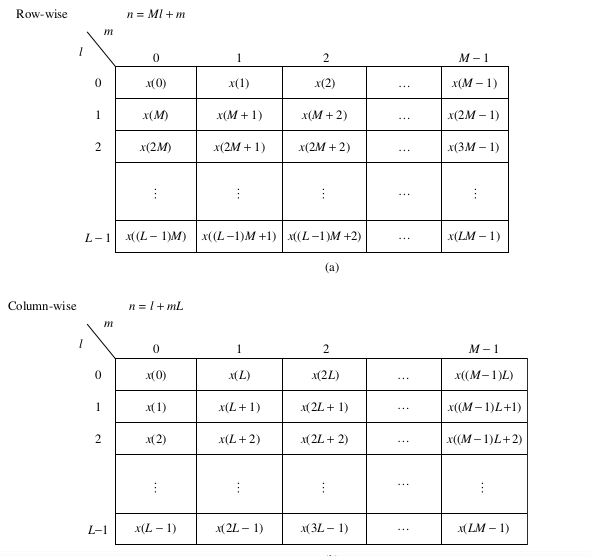

###**First, we compute the M -point DFTs**
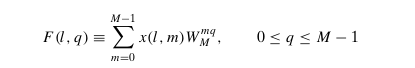

###**Second, we compute a new rectangular array G(l, q) deﬁned as**
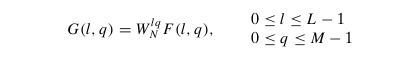
###**Finally, we compute the L-point DFTs**
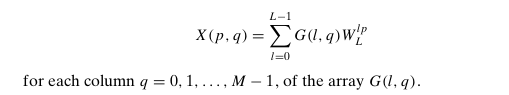


In [68]:
import matplotlib.pyplot as plt
import numpy as np

## Divide the input signal into 4 × 2 Matrix

---



[[1, 5], [2, 6], [3, 7], [4, 8]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


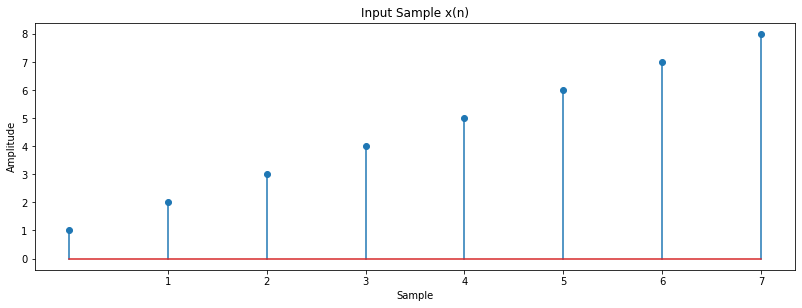

In [69]:

x=[1,2,3,4,5,6,7,8]


n=np.arange(-15,15)
matrix=[]
idx=0
idx1=int(len(x)/2)

for i in range(4):

  col=[]

  for j in range(2):
    
    if j==0:
      col.append(x[idx])
      idx+=1

    if j==1:
      col.append(x[idx1])
      idx1+=1
  
  matrix.append(col)

print(matrix)


plt.figure(figsize=(30,10))
plt.subplot(221)
plt.title("Input Sample x(n)")  
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.xticks(x)
plt.stem(x)
plt.show()

## 2 point DFT for each of the 4 rows

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


[[ 6.+0.00000000e+00j -4.-6.12323400e-16j]
 [ 8.+0.00000000e+00j -4.-7.34788079e-16j]
 [10.+0.00000000e+00j -4.-8.57252759e-16j]
 [12.+0.00000000e+00j -4.-9.79717439e-16j]]


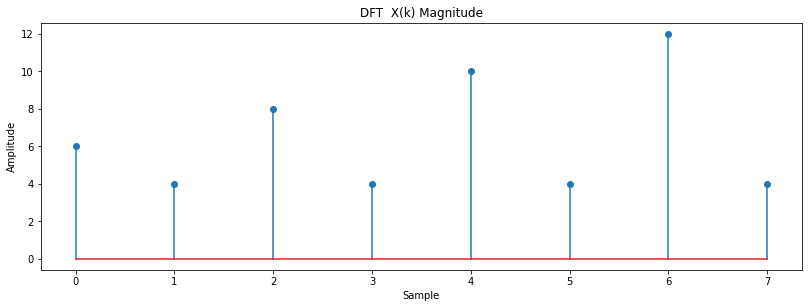

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


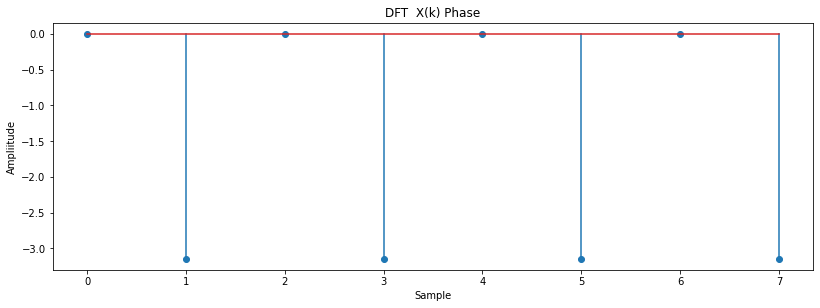

In [76]:
def compute_DFT(x_n,N):
  
  X_k=np.zeros(N,dtype=np.complex)
  for k in range(0,N,1):
    temp=0+0j
    for n in range(len(x_n)):
      temp+=(x_n[n]*np.exp((-1)*(1j*2*np.pi*k*n)/N))
    
    # print(temp)
      X_k[k]=temp
  return X_k



List=[]
for row in matrix:
  
    # print(row)
    x_n=np.array(row) #input signal
    # print(x_n)
    X_K=compute_DFT(x_n,2)
    # print(X_K)
    List.append(X_K)
  
  # print(DFT)

# print(List)
F=np.array(List)
# for x in DFT2:
#   print(x)
print(F)

plot=[]
for x in range(4):
  for y in range(2):
    plot.append(F[x][y])

magnitude=np.absolute(plot)
phase=np.angle(plot)
n=np.arange(-15,15)

plt.figure(figsize=(30,10))
plt.subplot(222)
plt.title("DFT  X(k) Magnitude")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.xticks(n)
plt.stem(magnitude)
plt.show()


plt.figure(figsize=(30,10))
plt.subplot(223)
plt.title("DFT  X(k) Phase")
plt.xlabel("Sample")
plt.ylabel("Ampliitude")
plt.xticks(n)
plt.stem(phase)
plt.show()



## Multiply with Phase Factor

[[ 6.00000000e+00+0.00000000e+00j -4.00000000e+00-6.12323400e-16j]
 [ 8.00000000e+00+0.00000000e+00j -2.82842712e+00+2.82842712e+00j]
 [ 1.00000000e+01+0.00000000e+00j -1.10218212e-15+4.00000000e+00j]
 [ 1.20000000e+01+0.00000000e+00j  2.82842712e+00+2.82842712e+00j]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


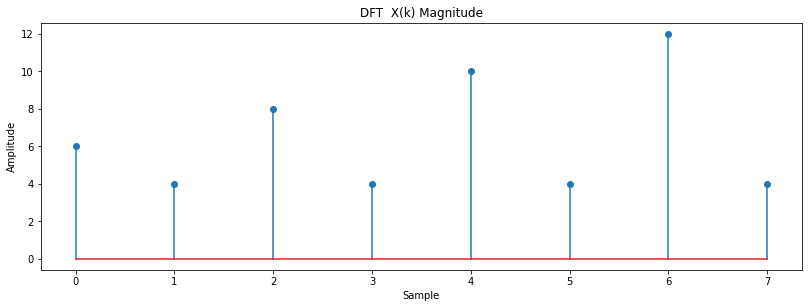

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


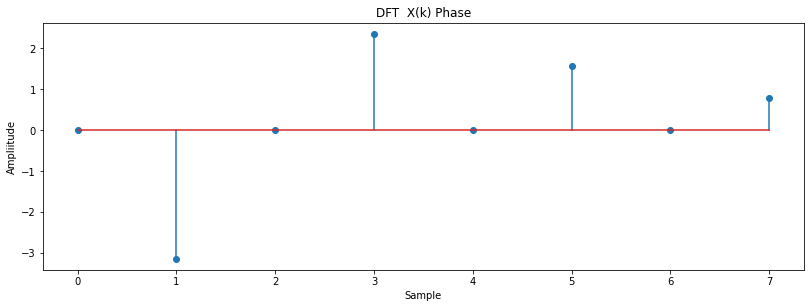

In [75]:


Phase_Factor=[]
for row in range(4):
  
  temp=[]

  for col in range(2):
     
     w=np.exp((-1)*(1j*2*np.pi*row*col)/8)
     temp.append(w)
  
  Phase_Factor.append(temp)

# print(Phase_Factor)

W=np.array(Phase_Factor)
# print(W)

G=np.multiply(W,F)

print(G)

plot=[]
for x in range(4):
  for y in range(2):
    plot.append(G[x][y])

magnitude=np.absolute(plot)
phase=np.angle(plot)
n=np.arange(-15,15)

plt.figure(figsize=(30,10))
plt.subplot(222)
plt.title("DFT  X(k) Magnitude")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.xticks(n)
plt.stem(magnitude)
plt.show()


plt.figure(figsize=(30,10))
plt.subplot(223)
plt.title("DFT  X(k) Phase")
plt.xlabel("Sample")
plt.ylabel("Ampliitude")
plt.xticks(n)
plt.stem(phase)
plt.show()


## 4 point DFT for each of 2 Columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


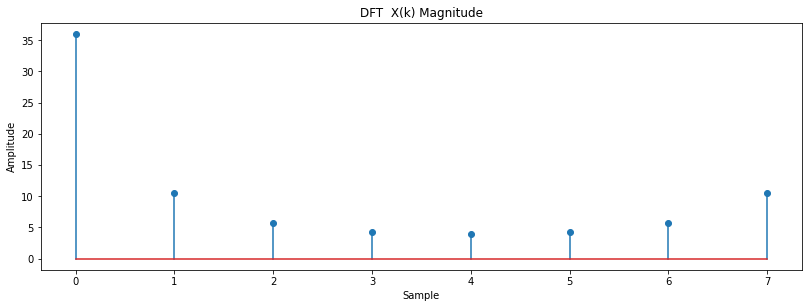

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


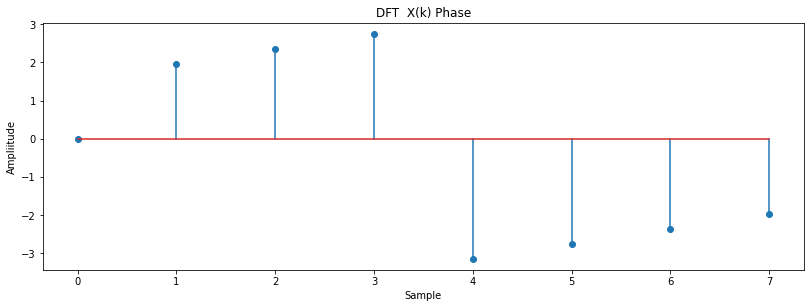

Final Output : [(36+0j), (-4.000000000000003+9.65685424949238j), (-4.000000000000001+3.9999999999999982j), (-4.000000000000001+1.6568542494923788j), (-4-2.9391523179536475e-15j), (-3.999999999999999-1.6568542494923815j), (-3.999999999999995-4.0000000000000036j), (-3.9999999999999933-9.65685424949238j)]


In [77]:


xk=[]
for col in range(2):

  temp=[]

  for row in range(4):

    temp.append(G[row][col])
    # print(temp)
  
  x=np.array(temp)

  ans=compute_DFT(x,4)
  xk.append(ans)

XK=np.array(xk)

plot=[]
for y in range(4):
  for x in range(2):
    plot.append(XK[x][y])

magnitude=np.absolute(plot)
phase=np.angle(plot)
n=np.arange(-15,15)

plt.figure(figsize=(30,10))
plt.subplot(222)
plt.title("DFT  X(k) Magnitude")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.xticks(n)
plt.stem(magnitude)
plt.show()


plt.figure(figsize=(30,10))
plt.subplot(223)
plt.title("DFT  X(k) Phase")
plt.xlabel("Sample")
plt.ylabel("Ampliitude")
plt.xticks(n)
plt.stem(phase)
plt.show()

print("Final Output :",plot)

